## Basic EDA (Numerical Features)

In [46]:
import sys
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML, display
from tqdm import tqdm_notebook as tqdm

PROJECT_DIR = "/app"
INPUT_FILE_PATH = Path("../..")
sys.path.insert(0, PROJECT_DIR)

display(HTML("<style>.container { width:88% !important; }</style>"))

In [48]:
from src.preprocess.access import pp_access
from src.preprocess.address import pp_address
from src.preprocess.age import pp_age
from src.preprocess.area import pp_area
from src.preprocess.contract import pp_contract
from src.preprocess.equipment import pp_equipment
from src.preprocess.floor_stories import pp_floor_stories
from src.preprocess.internet import pp_internet
from src.preprocess.kitchen import pp_kitchen
from src.preprocess.parking import pp_parking
from src.preprocess.read_file import read_file

In [50]:
train_df, test_df = read_file()
df = pd.concat([train_df, test_df], axis=0, sort=True)

## target : 賃料

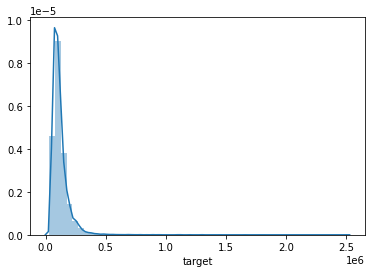

In [51]:
sns.distplot(train_df["target"])

In [52]:
train_df[train_df["target"] > 1000000]

,id,target,address,access,layout,age,direction,area,floor_stories,bathroom,kitchen,internet,equipment,parking,neighbor,material,contract
1501,1502,1200000,東京都港区元麻布３丁目,南北線\t麻布十番駅\t徒歩9分\t\t都営大江戸線\t六本木駅\t徒歩9分\t\t東京メト...,3LDK,18年6ヶ月,南東,163.62m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐車場\t空有\t57,000円(税込)",NaN,RC（鉄筋コンクリート）,5年間\t※この物件は\t定期借家\tです。
1771,1772,1450000,東京都大田区田園調布３丁目,東急東横線\t田園調布駅\t徒歩5分\t\t東急目黒線\t田園調布駅\t徒歩5分,4LDK+S(納戸),9年1ヶ月,南西,232.01m2,2階建,専用バス／\t専用トイレ／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,エアコン付\tウォークインクローゼット\tフローリング／\t室内洗濯機置場,駐車場\t空有,NaN,木造,4年間\t※この物件は\t定期借家\tです。
5093,5094,2500000,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
5775,5776,1203500,東京都港区新橋４丁目,山手線\t新橋駅\t徒歩2分\t\t都営大江戸線\t汐留駅\t徒歩2分,1K,12年5ヶ月,北西,20.53m2,10階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 432m\t【スーパー】 570m\t【コンビニ】 43m\t【コンビニ】 2...,RC（鉄筋コンクリート）,2年間
8706,8707,1390000,東京都港区虎ノ門５丁目11-1,日比谷線\t神谷町駅\t徒歩1分\t\t南北線\t六本木一丁目駅\t徒歩10分\t\t都営三...,2LDK,14年10ヶ月,東,138.99m2,7階／24階建,専用バス／\t専用トイレ／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tバルコニー／\t24時間換...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 558m\t【スーパー】 535m\t【コンビニ】 330m\t【コンビニ】 ...,鉄骨造,3年間\t※この物件は\t定期借家\tです。
9008,9009,1300000,東京都港区麻布台３丁目4-24,都営大江戸線\t麻布十番駅\t徒歩7分\t\t南北線\t六本木一丁目駅\t徒歩8分\t\t日...,3LDK+S(納戸),30年5ヶ月,南,223.71m2,3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t洗面台独...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tL字キッチン,NaN,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,駐車場\t空有\t0円\t駐輪場\t空有\tバイク置き場\t空有,【スーパー】 538m\t【コンビニ】 390m\t【コンビニ】 454m\t【スーパー】 ...,木造,3年間\t※この物件は\t定期借家\tです。
11367,11368,1100000,東京都新宿区新宿６丁目,都営大江戸線\t東新宿駅\t徒歩2分\t\t都営新宿線\t新宿三丁目駅\t徒歩10分\t\t...,2LDK,25年1ヶ月,南東,192.43m2,9階／10階建（地下1階）,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／\t洗面台独立／\t脱衣所,ガスコンロ／\tコンロ3口／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tロフト付き／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯機置場...,"駐車場\t空有\t43,200円",【スーパー】 170m\t【スーパー】 502m\t【コンビニ】 14m\t【コンビニ】 1...,SRC（鉄骨鉄筋コンクリート）,2年間
11958,11959,1120000,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩13分\t\t東急東横線\t...,4LDK,22年7ヶ月,南,221.3m2,11階／13階建,専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立...,ガスコンロ／\tコンロ4口以上／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tトランクルーム\t／\tウォークインクローゼット\tシューズボックス／\tバル...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 729m\t【コンビニ】 177m\t【スーパー】 363m\t【病院】 727m,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
15417,15418,1300000,東京都港区南麻布１丁目16-2,南北線\t麻布十番駅\t徒歩7分\t\t南北線\t白金高輪駅\t徒歩16分\t\t都営大江戸...,2LDK,5年1ヶ月,北,125m2,7階／7階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン／\tL字キッチン,インターネット対応／\t光ファイバー,エアコン付\tウォークインクローゼット\tシューズボックス／\tロフト付き／\tバルコニー／...,"駐車場\t空有\t54,000円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 217m\t【スーパー】 541m\t【コンビニ】 256m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
16847,16848,1120000,東京都渋谷区広尾１丁目1-7,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t広尾駅\t徒歩14分\t\t東急東横線\t...,4LDK,22年7ヶ月,東,221.3m2,11階／13階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,コンロ4口以上／\tシステムキッチン\t／\t給湯,光ファイバー／\tCATV,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,"駐車場\t空有\t64,800円\t(※サイズ・空き要確認)",【デパート】 964m\t【スーパー】 752m\t【スーパー】 989m\t【スーパー】 ...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


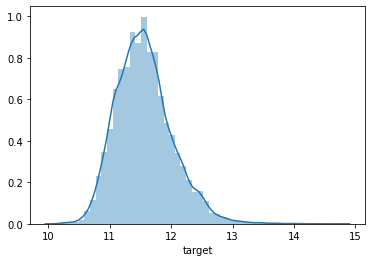

In [53]:
# looks like a log-normal distribution
sns.distplot(np.log(train_df["target"]))

## age : to float value  
ex) \
"3年9ヶ月" -> 3.75 \
"新築" -> 0

In [54]:
df["age"].value_counts()

0年1ヶ月      1885
新築         1739
0年0ヶ月      1375
0年2ヶ月      1273
0年3ヶ月       997
           ... 
62年2ヶ月        1
59年0ヶ月        1
66年5ヶ月        1
520年5ヶ月       1
65年5ヶ月        1
Name: age, Length: 771, dtype: int64

In [55]:
df = pp_age(df)

In [56]:
df["age"].astype(int).value_counts()

0     10535
11     2455
12     2441
2      2190
13     2159
      ...  
69        5
65        5
68        3
66        3
67        1
Name: age, Length: 71, dtype: int64

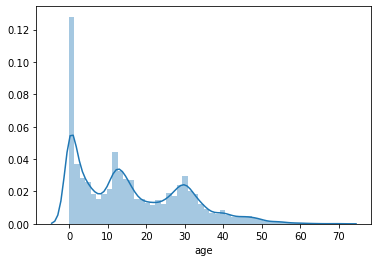

In [57]:
sns.distplot(df["age"])

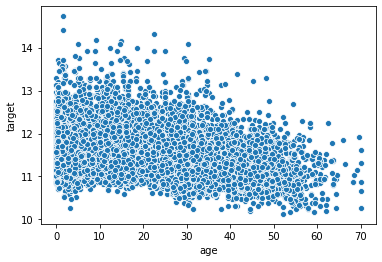

In [58]:
# Little correlation...
sns.scatterplot(x=df["age"], y=np.log(df["target"]))

## area : to float value
ex) \
'64.76m2' -> 64.76

In [59]:
df["area"].value_counts()

20m2        486
18m2        379
40m2        368
21m2        331
30m2        320
           ... 
105.1m2       1
32.41m2       1
106.51m2      1
12.47m2       1
64.01m2       1
Name: area, Length: 6721, dtype: int64

In [60]:
df = pp_area(df)

In [61]:
df["area"].astype(int).value_counts()

25     6696
20     3145
26     2490
40     2399
21     2314
       ... 
137       1
168       1
199       1
135       1
163       1
Name: area, Length: 177, dtype: int64

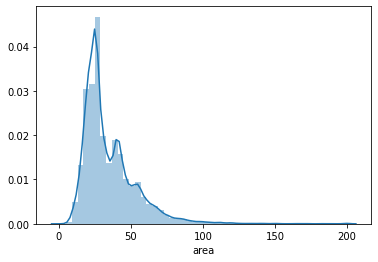

In [62]:
sns.distplot(df["area"])

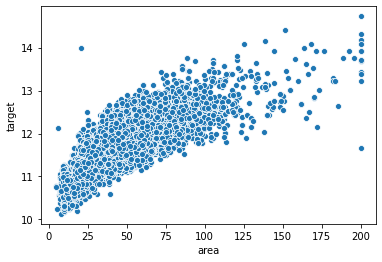

In [63]:
# relation between area and log(target)
# looks good!
sns.scatterplot(x=df["area"], y=np.log(df["target"]))

## floor_stories : floor (int) + stories(int)
ex) \
"12階／13階建" -> { floor: 12, stories: 13 }

In [64]:
df["floor_stories"].value_counts()

2階／2階建            5706
1階／2階建            5519
2階／3階建            4030
3階／3階建            3541
1階／3階建            3325
                  ... 
45階／49階建（地下2階）       1
22階／25階建（地下2階）       1
30階／32階建（地下1階）       1
6階／15階建（地下3階）        1
18階／55階建（地下2階）       1
Name: floor_stories, Length: 1402, dtype: int64

In [65]:
df["floor_stories"][df["floor_stories"].str.split("／", expand=True).iloc[:, 0] == ""]

99             ／3階建
122            ／8階建
583           ／12階建
671      ／3階建（地下1階）
814            ／2階建
            ...    
30529    ／3階建（地下1階）
30781          ／2階建
30826          ／2階建
31073          ／3階建
31184          ／2階建
Name: floor_stories, Length: 233, dtype: object

In [66]:
df[df["floor_stories"].isna()]

,access,address,age,area,bathroom,contract,direction,equipment,floor_stories,id,internet,kitchen,layout,material,neighbor,parking,target
9204,都営新宿線\t船堀駅\t徒歩11分\t\t東西線\t西葛西駅\t徒歩20分\t\t東西線\t...,東京都江戸川区宇喜田町1469-35,0.333333,94.91,バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台...,2年間,南西,バルコニー／\tルーフバルコニー\t／\tフローリング,NaN,40675,NaN,システムキッチン\t／\tL字キッチン,3LDK,鉄骨造,NaN,NaN,NaN


In [68]:
df = pp_floor_stories(df)

In [69]:
# THERE ARE MANY INVALID DATA!!!
df[df["floor"] > df["stories"]][["floor_stories", "floor", "stories", "target"]]

,floor_stories,floor,stories,target
1203,2階／1階建,2,1,110000.0
2611,3階,3,2,100000.0
11488,5階,5,2,176000.0
14238,10階／8階建,10,8,62000.0
20743,7階／2階建,7,2,89000.0
21504,4階／2階建,4,2,103000.0
28317,3階,3,2,161800.0
956,3階／2階建,3,2,NaN
983,2階／1階建,2,1,NaN
3154,13階／4階建（地下1階）,13,4,NaN


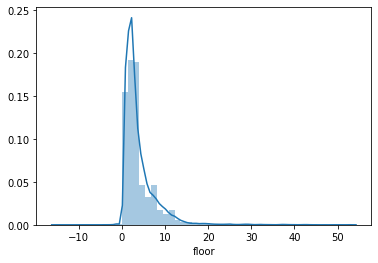

In [70]:
sns.distplot(df["floor"])

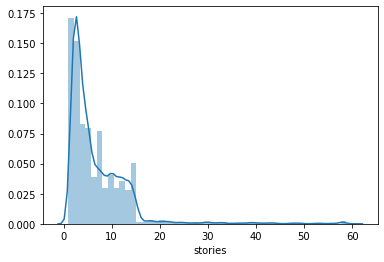

In [71]:
sns.distplot(df["stories"])

In [72]:
floor = df["floor"]
stories = df["stories"]

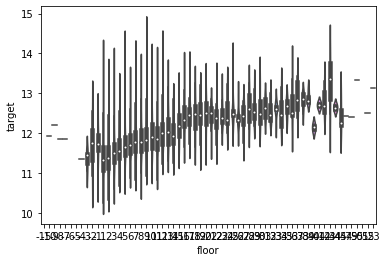

In [73]:
sns.violinplot(x=floor, y=np.log(df["target"]))

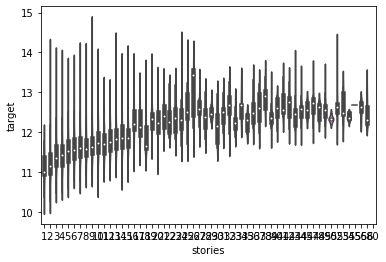

In [74]:
sns.violinplot(x=stories, y=np.log(df["target"]))

## contract : contract, periodic 

In [75]:
df = pp_contract(df)

In [76]:
contract = df["contract"]
periodic = df["periodic"]

In [77]:
contract.value_counts()

2.000000    61230
5.000000      516
3.000000      469
1.000000      309
4.000000      124
0.166667       20
6.000000       13
7.000000       13
0.000000       11
0.500000        8
0.750000        4
0.666667        4
0.083333        3
0.583333        3
0.416667        2
0.333333        2
0.250000        1
Name: contract, dtype: int64

In [78]:
periodic.value_counts()

0    59382
1     3350
Name: periodic, dtype: int64

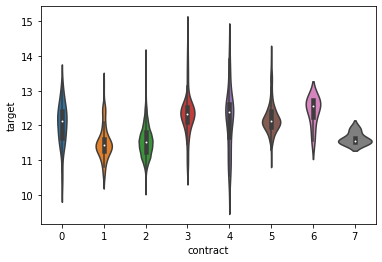

In [79]:
# Little correlation
sns.violinplot(x=contract.astype(int), y=np.log(df["target"]))

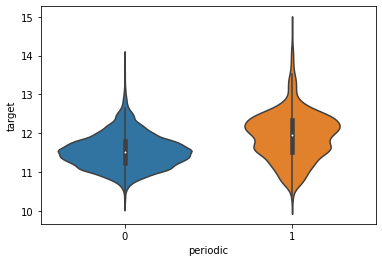

In [80]:
sns.violinplot(x=periodic, y=np.log(df["target"]))